# New postprocess debug tool

Inspired by An's MATLab debug tools. This module is designed to make checking parameters of STDOUT as painless as possible. 

Here, we compare running bash commands to the module written.

### Bash commands
In the early stages of setting up the problem, we want to diagnose what has blown up our code. A common parameter to investigate is the **CFL condition** in the smallest spatial dimension, $w$. Below, we implement two parsing commands to isolate the values of a given parameter name that can be found in **STDOUT.####** files. 

In [1]:
# Pull the info you want in STDOUT.0000
import subprocess as sp

def captureParameter ( paramName ):
    # Clean up selection to only keep the number values
    # Return a list of values
    cmd1 = ( 'grep "%s" STDOUT.0000 > tmp; ' % (paramName) )
    cmd2 = ( 'awk \'{print $6}\' tmp > %s; ' % (paramName) )
    cmd3 = ( 'rm tmp')
    sp.Popen( cmd1+cmd2+cmd3, shell=True )
    
    with open(paramName) as f:
        lines = f.readlines()
        result = []
        for l in lines:
            result.append( float(l.split('\n')[0]) )
    return result

The **captureParameter** function is naive to information structure of the non-machine readable file, **STDOUT.####**. You also need to know the paramter name before extracting the information. We end up creating a temporary file with the parameter values we want to investigate, which isn't the leanest approach. 

In [2]:
# write a file with only the vector of values
ans1 = captureParameter('advcfl_wvel_max')

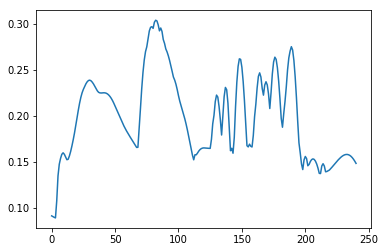

In [8]:
import matplotlib.pyplot as plt

plt.plot(ans1)
plt.show()

### getSTDOUT module

I'm no module writing expert, so if you have any experience with python modules we need to create this module so all you have to do in your main code is import a MITgcm postprocess module (HELP!).

    ie.In myplottingcode.py
    Line 1: import \<postprocess module\>
    ...
    Line n: d = getData( filename ) 

Instead of thinking about how to chop the **STDOUT.####** file, we take advantage of the built-in regex library in Python and use the monitor variables pattern to search data by variable name. No files are being written and erased and there has been an emphasis on lean memory use. 

For now, put the attached **.py** file in the same directory where you would want to plot for debugging using **STDOUT.####**. Then, write a Python script using your favorite plotting techniques. A basic example is provided below that compares to the above technique. 

In [4]:
from getSTDOUT import *

In [5]:
absolute_path_to_my_STDOUT = ''
d = getData( ( absolute_path_to_my_STDOUT + 'STDOUT.0000' ) )

If you aren't sure which parameter you want to plot, you can print the unique variable names using the **varNames** object. 
    
    print( d.varNames ) 

In [6]:
ans2 = d.getVals( 'advcfl wvel max' )

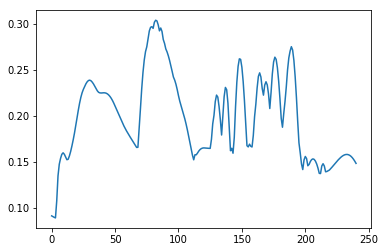

In [7]:
import matplotlib.pyplot as plt

plt.plot(ans2)
plt.show()

We'll find a home for this in one of the CRIOS repos soon. For now, bear with me and feel free to play with the module.